# MP3 Machine Learning FOR Analysis And Prediction

In [506]:
# Install the graphviz package for DT visualisation
!pip install graphviz

In [507]:
# Imports
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
# We used matplotlib instead
# import graphviz
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

## 1. Data wrangling and exploration

In [508]:
# Load
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [509]:
# Check the shape of the DataFrame (rows, columns)
data.shape

(1470, 35)

In [510]:
# show all columns
pd.set_option("display.max_columns", None)

In [511]:
# Display the first 5 rows
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [512]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [513]:
# display the last 5 rows
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [514]:
# Check columns for null data
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [515]:
# Check for duplicated data
data.duplicated().sum()

np.int64(0)

In [516]:
# Check for negative values in numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
(data[numeric_cols] < 0).any()

Age                         False
DailyRate                   False
DistanceFromHome            False
Education                   False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobSatisfaction             False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLastPromotion     False
YearsWithCurrManager        False
dtype: bool

In [517]:
# Check if all Over18 is always 'Y'
data['Over18'].value_counts()

Over18
Y    1470
Name: count, dtype: int64

In [518]:
# Double checking the Age column to check if everyone is over 18
(data['Age'] >= 18).all()

np.True_

### Exploration notes
There is a lot of different type of data; numeric, categorical, binary. So a mix of nominal and ordinal.

### Cleaning notes
We can see that some columns contains data that is constant, like StandardHours is always 80 and EmployeeCount is always 1 and Over18 is always 'Y'. Lastly EmployeeNumber is an identifier which is a useless feature, we already use indices for the dataframe. So we could consider dropping these columns.

In [519]:
# Drop useless columns in a new dataframe
data1 = data.copy()
data1 = data1.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'], axis=1)

In [520]:
# Check if columns were dropped correctly
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

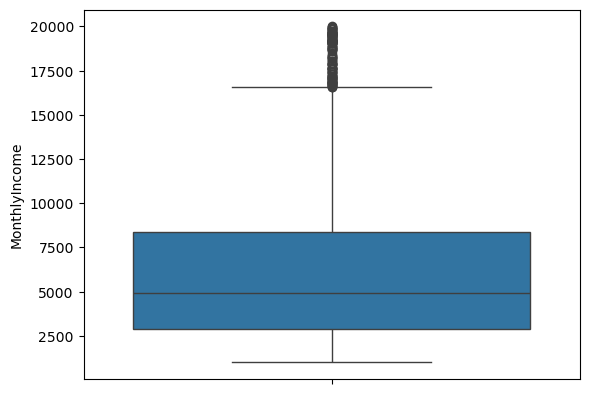

In [521]:
# Boxplot for monthly income
sns.boxplot(y='MonthlyIncome', data=data1)
plt.show()

In [522]:
# Label encoding for binary data
binary_mapping = {'Yes': 1, 'No': 0, 'Y': 1, 'N': 0}
data1['Attrition'] = data1['Attrition'].map(binary_mapping)
data1['OverTime'] = data1['OverTime'].map(binary_mapping)
data1['Gender'] = data1['Gender'].map({'Male': 1, 'Female': 0})

In [523]:
# Check if label encoding was successful
cols = ['Attrition', 'OverTime', 'Gender']
data1[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Attrition  1470 non-null   int64
 1   OverTime   1470 non-null   int64
 2   Gender     1470 non-null   int64
dtypes: int64(3)
memory usage: 34.6 KB


In [524]:
# One-hot encoding
data1 = pd.get_dummies(data1, columns=['BusinessTravel','Department','JobRole','EducationField','MaritalStatus'], drop_first=True)

In [525]:
# Check new dataframe
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   Gender                             1470 non-null   int64
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

In [526]:
# Check new dataframe
data1.head(5)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,False,True,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True
1,49,0,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False
2,37,1,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True
3,33,0,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False
4,27,0,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,False,True,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False


## 2. Predict monthly income

If we want to predict monthly income, the MonthlyIncome is our dependent variable. The y in our linear function.

### Correlation

In [527]:
# Correlation matrix
corr_matrix = data1.corr(numeric_only=True)

# Sort correlations with MonthlyIncome
income_corr = corr_matrix['MonthlyIncome'].sort_values(ascending=False)
print(income_corr)

MonthlyIncome                        1.000000
JobLevel                             0.950300
TotalWorkingYears                    0.772893
JobRole_Manager                      0.619573
YearsAtCompany                       0.514285
Age                                  0.497855
JobRole_Research Director            0.485818
YearsInCurrentRole                   0.363818
YearsSinceLastPromotion              0.344978
YearsWithCurrManager                 0.344079
NumCompaniesWorked                   0.149515
Education                            0.094961
Department_Sales                     0.063978
EducationField_Marketing             0.062576
MaritalStatus_Married                0.056767
JobRole_Manufacturing Director       0.055684
JobRole_Sales Executive              0.047792
BusinessTravel_Travel_Rarely         0.038779
MonthlyRate                          0.034814
WorkLifeBalance                      0.030683
RelationshipSatisfaction             0.025873
DailyRate                         

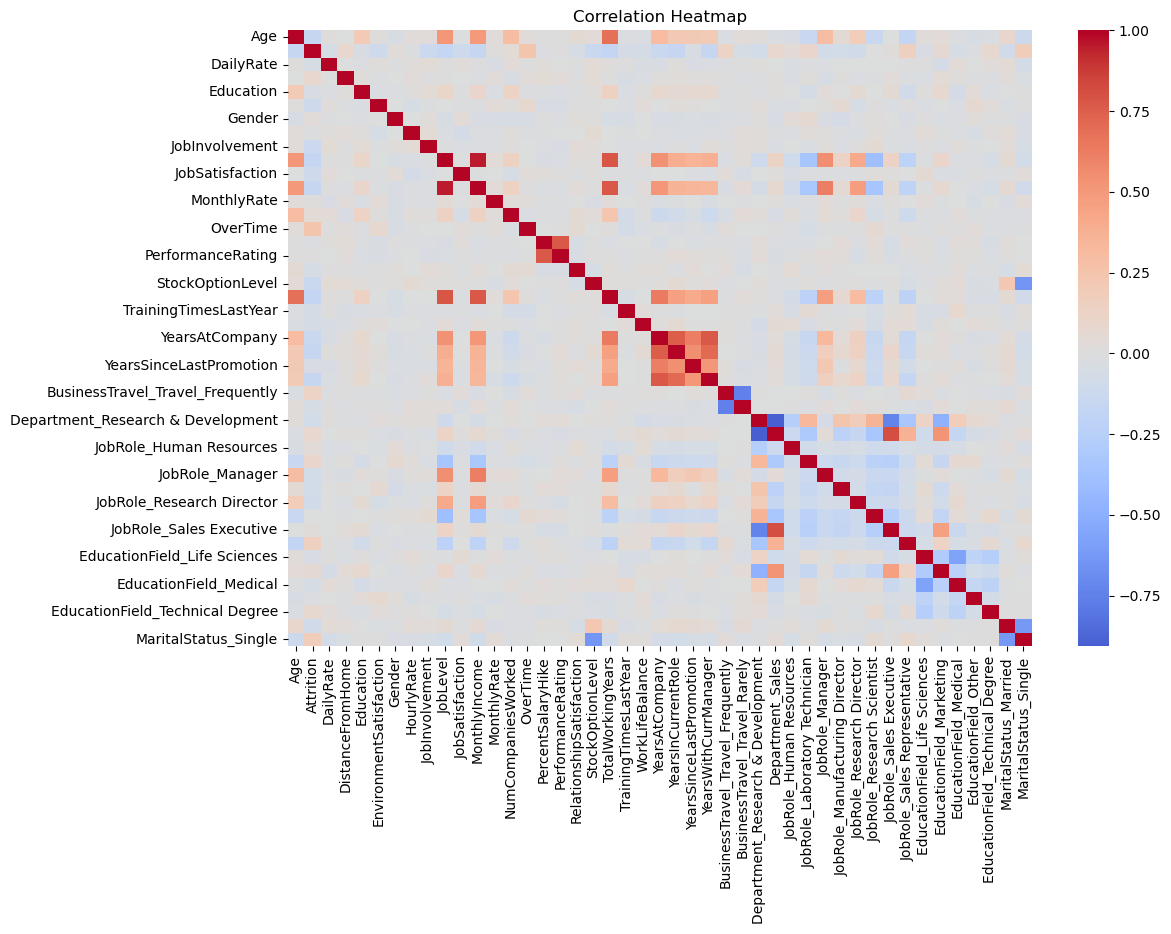

In [528]:
# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

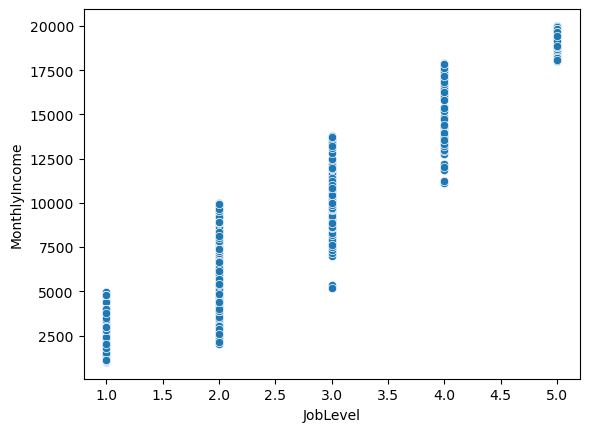

In [529]:
# Focused scatterplots for top correlations
sns.scatterplot(x='JobLevel', y='MonthlyIncome', data=data1)
plt.show()

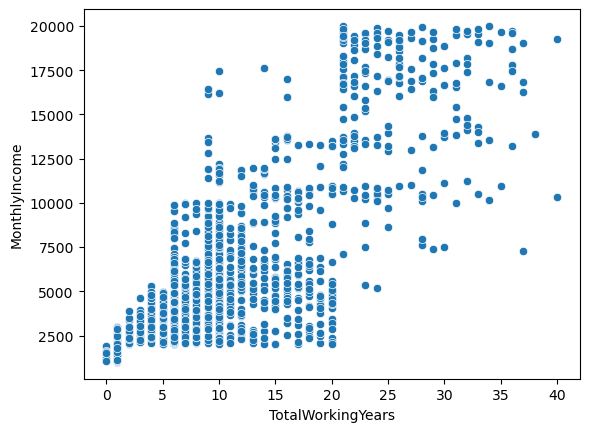

In [530]:
# Focused scatterplots for top correlations
sns.scatterplot(x='TotalWorkingYears', y='MonthlyIncome', data=data1)
plt.show()

In [531]:
# Print the total number of each gender, females are 0, males are 1
print(data1['Gender'].value_counts())

Gender
1    882
0    588
Name: count, dtype: int64


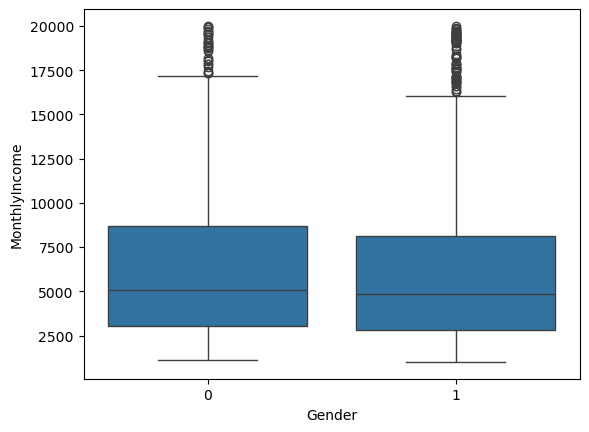

In [532]:
# Boxplot for gender and monthly income, 1 = male and 0 = female
sns.boxplot(x='Gender', y='MonthlyIncome', data=data1)
plt.show()

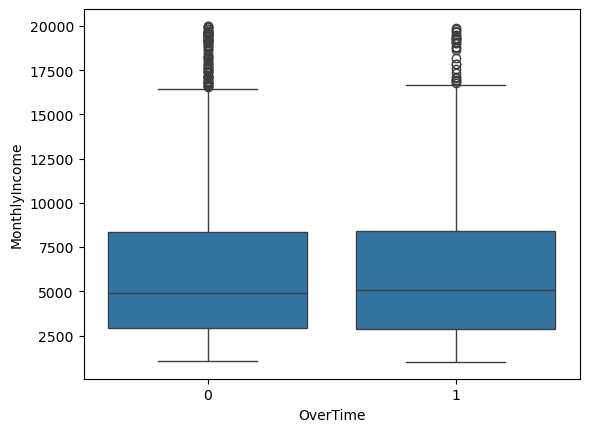

In [533]:
# Boxplot for overtime and monthly income, Yes = 1 and No = 0
sns.boxplot(x='OverTime', y='MonthlyIncome', data=data1)
plt.show()

## Train-Test Split

In [534]:
# independent
X = data1['JobLevel'].values.reshape(-1, 1) # Uppercase X because we could have multiple columns of X values
# dependent
y = data1['MonthlyIncome'].values.reshape(-1, 1)
# We want to predict the monthly income based on the job level, so the predict = dependent, the measured = independent

In [535]:
y

array([[5993],
       [5130],
       [2090],
       ...,
       [6142],
       [5390],
       [4404]])

In [536]:
sns.lmplot(x='JobLevel',y='MonthlyIncome',data=data1,fit_reg=True) 

In [537]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.15) # random_state is like a seed for random generation

In [538]:
# the shape of the subsets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1249, 1)
(1249, 1)
(221, 1)
(221, 1)


## Train the ML Model

In [539]:
# creating an instance of Linear Regression model
myreg = LinearRegression()

In [540]:
# fit it to our data
myreg.fit(X_train, y_train)
myreg

LinearRegression()

In [541]:
# get the calculated coefficients
a = myreg.coef_
b = myreg.intercept_

In [542]:
a

array([[4004.17115665]])

In [543]:
b

array([-1766.77700272])

In [544]:
print(f"The model is a line, y = a * x + b, or y = {a} * x + {b}")

The model is a line, y = a * x + b, or y = [[4004.17115665]] * x + [-1766.77700272]


## Test the Models

### Test with the Test Data

In [545]:
y_predicted = myreg.predict(X_test)
y_predicted

array([[ 2237.39415393],
       [ 6241.56531058],
       [ 6241.56531058],
       [ 2237.39415393],
       [ 2237.39415393],
       [ 2237.39415393],
       [ 2237.39415393],
       [ 2237.39415393],
       [ 6241.56531058],
       [ 6241.56531058],
       [ 2237.39415393],
       [ 6241.56531058],
       [ 6241.56531058],
       [ 6241.56531058],
       [10245.73646723],
       [10245.73646723],
       [14249.90762388],
       [ 2237.39415393],
       [ 6241.56531058],
       [ 6241.56531058],
       [14249.90762388],
       [18254.07878053],
       [10245.73646723],
       [10245.73646723],
       [ 2237.39415393],
       [ 6241.56531058],
       [ 2237.39415393],
       [10245.73646723],
       [14249.90762388],
       [ 2237.39415393],
       [18254.07878053],
       [ 6241.56531058],
       [10245.73646723],
       [ 2237.39415393],
       [ 6241.56531058],
       [14249.90762388],
       [ 6241.56531058],
       [ 2237.39415393],
       [ 2237.39415393],
       [ 2237.39415393],


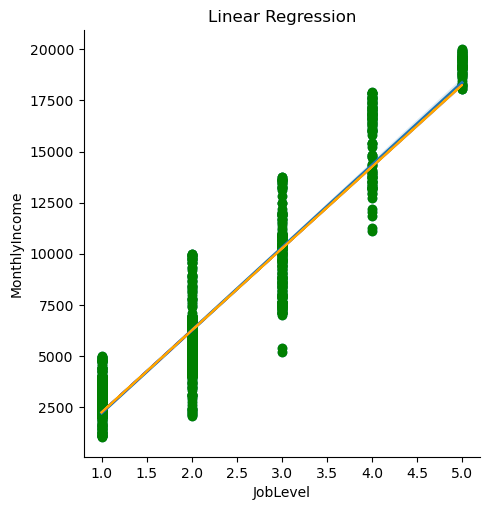

In [546]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_train, a*X_train + b, color='blue')
plt.plot(X_test, y_predicted, color='orange')
plt.xlabel('JobLevel')
plt.ylabel('MonthlyIncome')
plt.show()

In [547]:
# Predict the Monthly income by Job level
monthly_income_predicted = myreg.predict([[3]])
monthly_income_predicted

array([[10245.73646723]])

In [548]:
# Test by inputting into formular
monthly_income_predicted = a * 3 + b
monthly_income_predicted

array([[10245.73646723]])

## Predict unknown data

In [549]:
# Assume a employee
job_level = 5
monthly_income_predicted = myreg.predict([[job_level]])
monthly_income_predicted

array([[18254.07878053]])

## Step 6: Model Evaluation 

We need evaluation metrics designed for comparing continuous values.

The **three common evaluation metrics** for regression problems:

- **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

- **Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

- **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [550]:
# MAE
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_predicted)
print(mae)

1251.8001823330633


In [551]:
# MSE
mse = metrics.mean_squared_error(y_test, y_predicted)
print(mse)

2667898.9447026155


In [552]:
# RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
print(rmse)

1633.3704248279432


## Evaluation notes
On average our model will get the monthly income wrong by 1251 dollars. Taking into account the larger errors it will be 1633 dollars.

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error, measured in the same units like the data
- **MSE** is more popular than MAE, because MSE amplifies larger errors, making it useful when larger errors are particularly costly
- **RMSE** is even more popular than MSE, because RMSE combines the benefits of both MSE and MAE

### Calculate R-squared

In [553]:
# Explained variance score: the proportion of the variance in a dependent variable that can be explained by the model
# 1 for perfect prediction
eV = round(sm.explained_variance_score(y_test, y_predicted), 2)
print('Explained variance score ',eV )

Explained variance score  0.89


In [554]:
# R-squared: the proportion of the variation in the dependent variable that is predictable from the independent variable(s)
#r2_score(y, predict(X))
r2_score(y_test, y_predicted)

0.8912951210956628

# 3. Predict employee Attrition

Attrition is the value that measures wether an employee has left the company or not, in the original dataset it was measured as 'Yes' or 'No'. When it was transformed to numeric it became 1 or 0 respectively. So 1 = Left the job and 0 = Still employeed

### Correlation between attrition

In [555]:
# Correlation matrix
corr_matrix1 = data1.corr(numeric_only=True)

# Sort correlations with Attrition
attrition_corr = corr_matrix1['Attrition'].sort_values(ascending=False)
print(attrition_corr)

Attrition                            1.000000
OverTime                             0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel_Travel_Frequently     0.115143
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
JobRole_Human Resources              0.036215
Gender                               0.029453
JobRole_Sales Executive              0.019774
MonthlyRate                          0.015170
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.000360
HourlyRate                          -0.006846
PercentSalaryHike                   -0.013478
EducationField_Other                -0.017898
Education                           -0.031373
EducationField_Life Sciences      

None of the values have a high correlation with attrition individually, so it's most likely a combination of multiply factors. The strongest posetive correlations are OverTime, MaritalStatus_Single, JobRole_Sales Rep and the strongest negative correlations are YearsInCurrentRole, JobLevel, TotalWorkingYears, Age, MonthlyIncome.

In [556]:
# Correlation matrix
corr_matrix2 = data1.corr(numeric_only=True)

# Sort correlations with JobSatisfaction
jobsat_corr = corr_matrix2['JobSatisfaction'].sort_values(ascending=False)
print(jobsat_corr)

JobSatisfaction                      1.000000
EducationField_Life Sciences         0.052004
Gender                               0.033252
DailyRate                            0.030571
BusinessTravel_Travel_Frequently     0.027117
MaritalStatus_Single                 0.024571
OverTime                             0.024539
JobRole_Research Scientist           0.020503
PercentSalaryHike                    0.020002
Department_Sales                     0.013499
JobRole_Sales Executive              0.012604
StockOptionLevel                     0.010690
EducationField_Other                 0.003380
PerformanceRating                    0.002297
JobRole_Sales Representative         0.001413
MonthlyRate                          0.000644
JobLevel                            -0.001944
YearsInCurrentRole                  -0.002305
Department_Research & Development   -0.002798
DistanceFromHome                    -0.003669
YearsAtCompany                      -0.003803
Age                               

We can also see that there is no correlation between JobSatisfaction and any other value, but we would assume that employees who are unsatisfied with their job would quit.

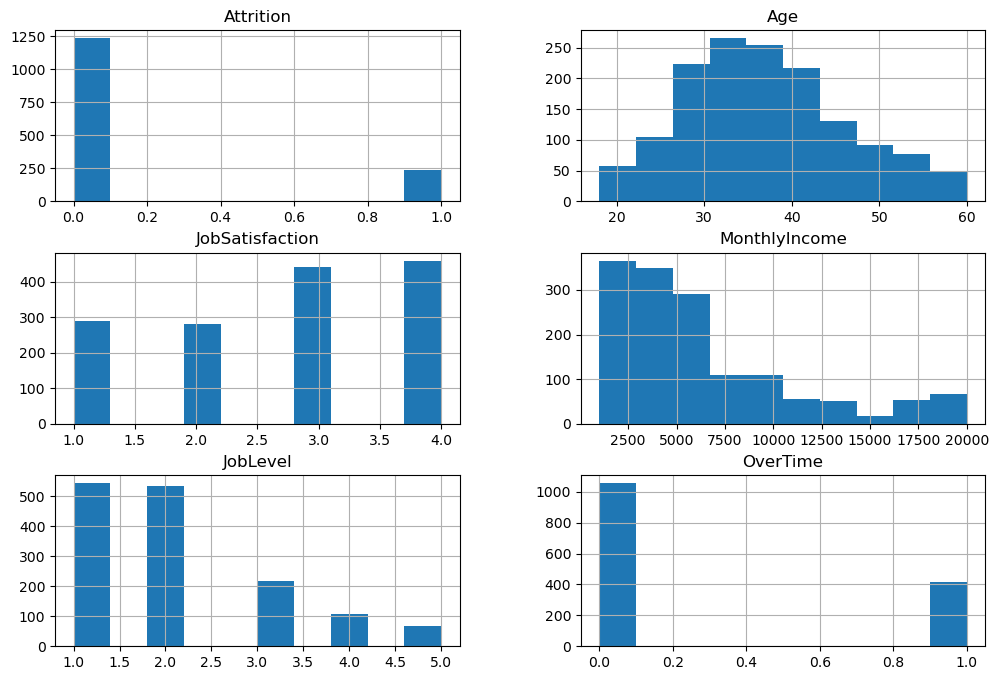

In [557]:
# Exploration of data
data1[['Attrition','Age','JobSatisfaction', 'MonthlyIncome', 'JobLevel', 'OverTime']].hist(figsize=(12,8))
plt.show()

In [558]:
# Convert the dataset into array
array = data1.values

In [559]:
array

array([[41, 1, 1102, ..., False, False, True],
       [49, 0, 279, ..., False, True, False],
       [37, 1, 1373, ..., False, False, True],
       ...,
       [27, 0, 155, ..., False, True, False],
       [49, 0, 1023, ..., False, True, False],
       [34, 0, 628, ..., False, True, False]], dtype=object)

In [560]:
# Create two (sub) arrays from it
# X - features, all rows, all columns but the last one
# y - labels, all rows, the last column
X, y = array[:, :-1], array[:, -1].astype(int)

In [561]:
# Separate input data into classes based on labels of attrition, 0 = still working, 1 = no longer working
class0 = np.array(X[y==0])
class1 = np.array(X[y==1])

## Training
Time to try to train a model.
1. Split the dataset into two: __training set__ and __test set__
2. Build the classifier by implementing __Decision Tree__ algorithm over the training set
3. Test the classifier over the test set
3. Estimate how accurate it is

In [562]:
# Split the dataset into into training and testing sets in proportion 8:2 
#   85% of it as training data
#   15% as a validation dataset
set_prop = 0.15

In [563]:
#  Initialize seed parameter for the random number generator used for the split
seed = 12

In [564]:
# Split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=set_prop, random_state=seed)

In [565]:
# Build Decision Trees Classifier 
params = {'max_depth': 5}
classifier = DecisionTreeClassifier(max_depth=5)
# classifier = RandomForestClassifier(n_estimators = 100, max_depth = 6)

In [566]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

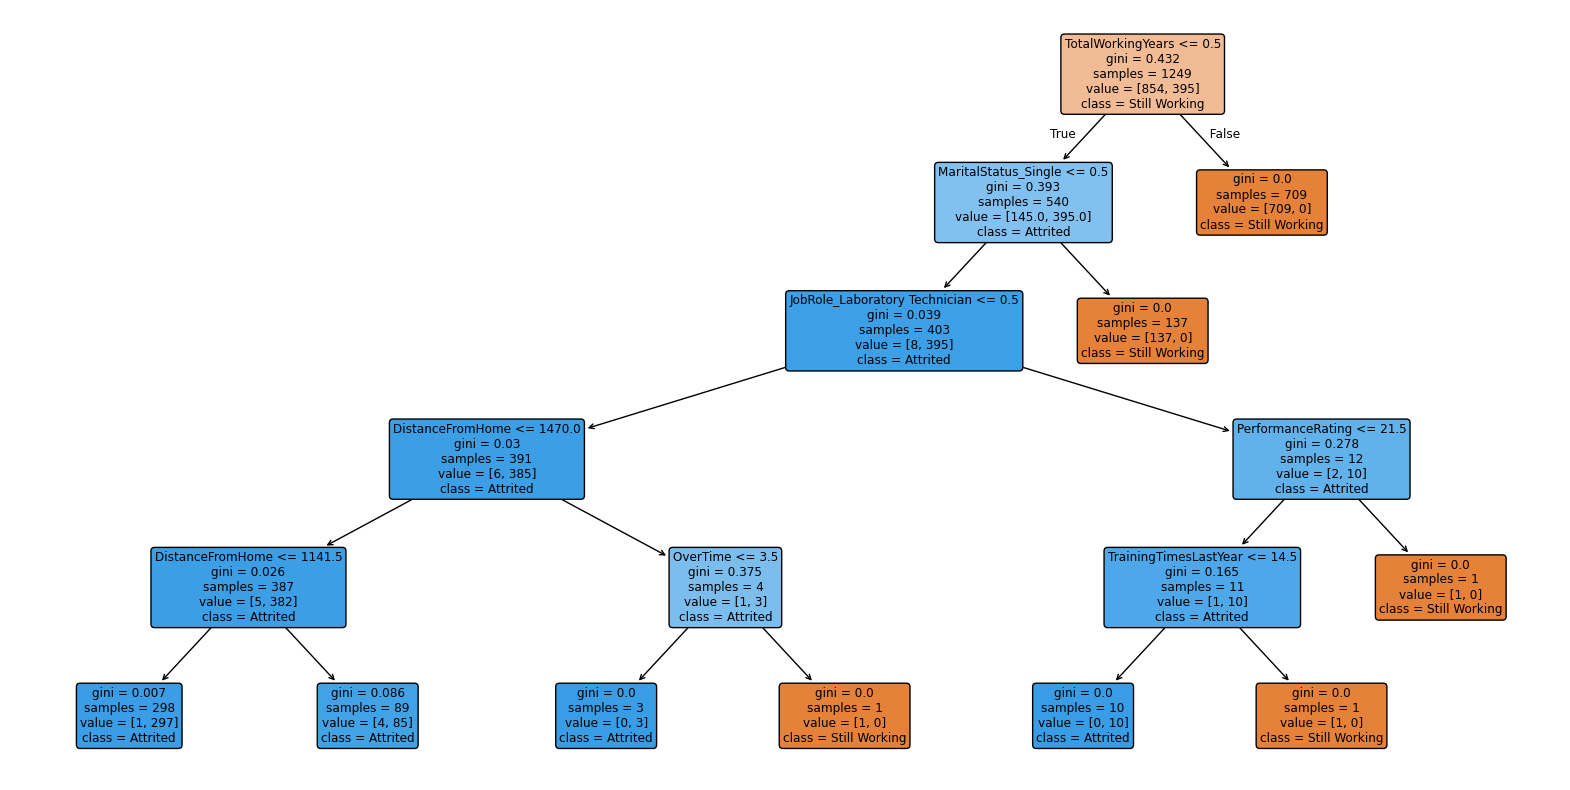

In [567]:
# draw tree from the trained data by graphviz package

plt.figure(figsize=(20,10))
tree.plot_tree(classifier,
               feature_names=data1.drop("Attrition", axis=1).columns,
               class_names=["Still Working", "Attrited"],
               filled=True,
               rounded=True)
plt.show()

## Step 5. Model Validation

We need a metrics for the evaluation
‘accuracy‘ is the percentage % of correctly predicted instances from the total number of instances in the dataset.

In [568]:
# Set the metrics
scoring = 'accuracy'

Now we can try to implement the model on our test set.

In [569]:
# Predict the labels of the test data
y_testp = classifier.predict(X_test)
y_testp

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1])

In [570]:
y_test

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1])

In [571]:
# Calculated the accuracy of the model comparing the observed data and predicted data
print ("Accuracy is ", accuracy_score(y_test,y_testp))

Accuracy is  0.9909502262443439


In [572]:
# Create confusion matrix
confusion_mat = confusion_matrix(y_test,y_testp)
confusion_mat

array([[146,   0],
       [  2,  73]])

In [573]:
confusion = pd.crosstab(y_test,y_testp)
confusion

col_0,0,1
row_0,,
0,146,0
1,2,73


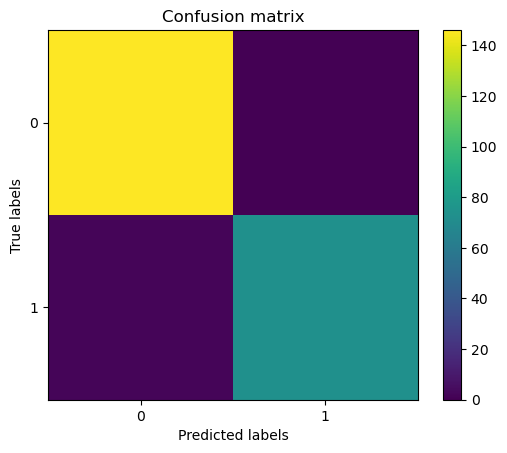

In [574]:
# Visualize confusion matrix
plt.imshow(confusion_mat, interpolation='nearest')
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(2)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

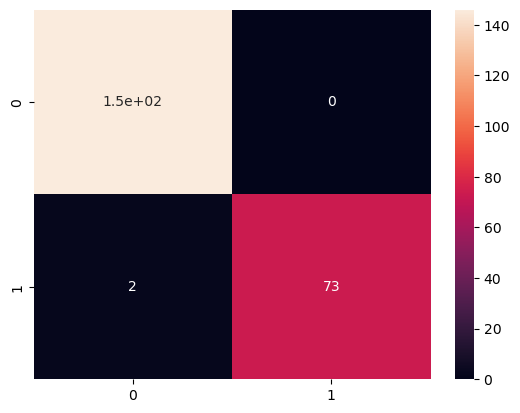

In [575]:
sns.heatmap(confusion_mat, annot=True)
plt.show()

In [576]:
# The diagonal elements (TN, TP) represent the number of points for which the predicted label is equal to the true label, 
# while off-diagonal elements are those that are mislabeled by the classifier. 
# The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.
# FN - False Negative prediction
# FP - False Positive prediction

In [577]:
# Confusion matrix provides an indication of the  errors made in predictions, here in text format
# print(confusion_matrix(y_test, y_testp))

In [578]:
class_names = ['Working', 'Not Working']
# Classifier performance on training dataset

print(classification_report(y_train, classifier.predict(X_train), target_names=class_names) )
plt.show()

              precision    recall  f1-score   support

     Working       1.00      0.99      1.00       854
 Not Working       0.99      1.00      0.99       395

    accuracy                           1.00      1249
   macro avg       0.99      1.00      1.00      1249
weighted avg       1.00      1.00      1.00      1249



## 4

## Implement KMeans Algorithm for Training a Prediction Model

In [579]:
# Convert all bool columns to 0 1 integers
data2 = data1.copy()
bool_cols = data2.select_dtypes(include=["bool"]).columns
data2[bool_cols] = data2[bool_cols].astype(int)

data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   Gender                             1470 non-null   int64
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

In [580]:
X_clustering = data2.values
scaler1 = StandardScaler()
X_scaled_clustering = scaler1.fit_transform(X_clustering)

c:\Users\gervi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\gervi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\gervi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\gervi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

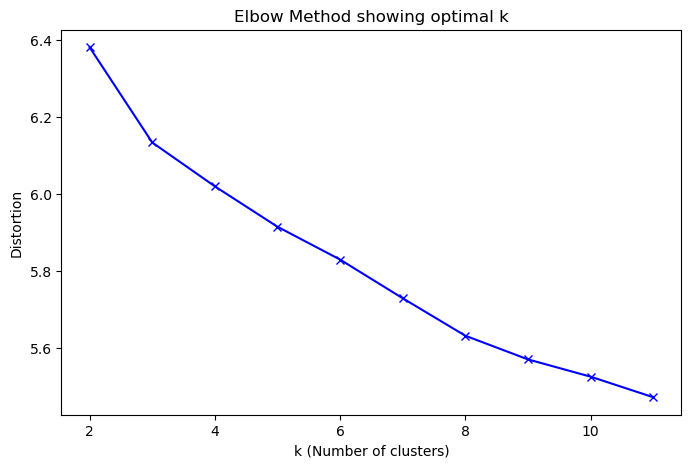

In [581]:
distortions = []
K = range(2, 12)
for k in K:
    model = KMeans(n_clusters=k, n_init=10, random_state=42)
    model.fit(X_scaled_clustering)
    distortions.append(
        sum(np.min(cdist(X_scaled_clustering, model.cluster_centers_, 'euclidean'), axis=1)) / X_scaled_clustering.shape[0]
    )

plt.figure(figsize=(8,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k (Number of clusters)')
plt.ylabel('Distortion')
plt.title('Elbow Method showing optimal k')
plt.show()

The distortion is should approximate 0 with increasing amount of clusters. But we can see on the graph that we have a lot of clusters but we are not getting close to a satisfying distortion value. Creating more and more cluster can lead to overfitting, so this clustering method is not a good fit. Possibly due to the amount of varying data we used for the clustering method (we used the entire dataset).

In [582]:
# Create a new dataset without bool columns
data_no_bools = data1.drop(columns=data1.select_dtypes(include=["bool"]).columns)

data_no_bools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   DailyRate                 1470 non-null   int64
 3   DistanceFromHome          1470 non-null   int64
 4   Education                 1470 non-null   int64
 5   EnvironmentSatisfaction   1470 non-null   int64
 6   Gender                    1470 non-null   int64
 7   HourlyRate                1470 non-null   int64
 8   JobInvolvement            1470 non-null   int64
 9   JobLevel                  1470 non-null   int64
 10  JobSatisfaction           1470 non-null   int64
 11  MonthlyIncome             1470 non-null   int64
 12  MonthlyRate               1470 non-null   int64
 13  NumCompaniesWorked        1470 non-null   int64
 14  OverTime                  1470 non-null 

In [583]:
X_clustering2 = data_no_bools.values

scaler2 = StandardScaler()
X_scaled_clustering2 = scaler2.fit_transform(X_clustering2)

c:\Users\gervi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\gervi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\gervi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\gervi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

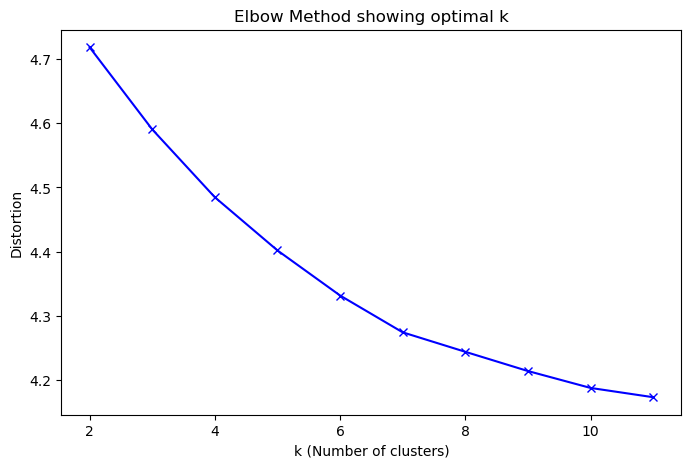

In [584]:
distortions2 = []
K = range(2, 12)
for k in K:
    model = KMeans(n_clusters=k, n_init=10, random_state=42)
    model.fit(X_scaled_clustering2)
    distortions2.append(
        sum(np.min(cdist(X_scaled_clustering2, model.cluster_centers_, 'euclidean'), axis=1)) / X_scaled_clustering2.shape[0]
    )

plt.figure(figsize=(8,5))
plt.plot(K, distortions2, 'bx-')
plt.xlabel('k (Number of clusters)')
plt.ylabel('Distortion')
plt.title('Elbow Method showing optimal k')
plt.show()

We removed all our hot encoded data, but the distortion is still too high. Possibly due to clustering with too much data still.

c:\Users\gervi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\gervi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\gervi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\gervi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

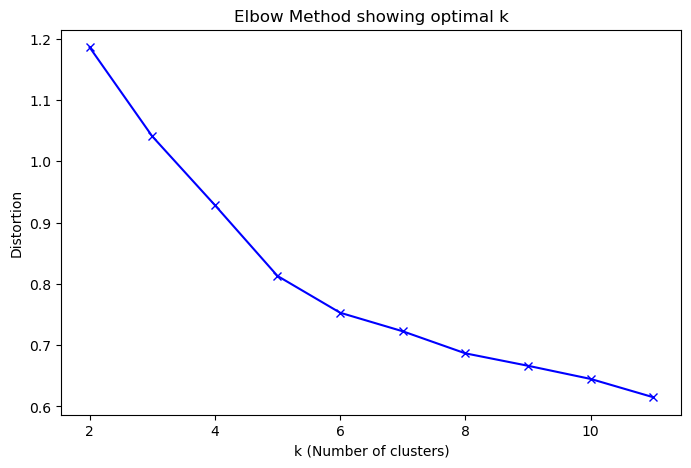

In [585]:
K_features = data1[["Age", "MonthlyIncome", "YearsAtCompany"]]

X_clustering3 = K_features

scaler3 = StandardScaler()
X_scaled_clustering3 = scaler3.fit_transform(X_clustering3)

distortions3 = []
K = range(2, 12)
for k in K:
    model = KMeans(n_clusters=k, n_init=10, random_state=42)
    model.fit(X_scaled_clustering3)
    distortions3.append(
        sum(np.min(cdist(X_scaled_clustering3, model.cluster_centers_, 'euclidean'), axis=1)) / X_scaled_clustering3.shape[0]
    )

plt.figure(figsize=(8,5))
plt.plot(K, distortions3, 'bx-')
plt.xlabel('k (Number of clusters)')
plt.ylabel('Distortion')
plt.title('Elbow Method showing optimal k')
plt.show()

In [ ]:
# Optimal number of clusters K
num_clusters = 3

We choose max clusters as 3 because the distortion value is a close to 1, which is acceptable. So further clustering would just lead to overfitting. It might look like further clusters would be a better fit, but the graph is a little misleading because the y-axis for distortion doesn't increment a lot (it got from 0.6 to 1.2).

In [587]:
# Create an instance of KMeans classifier
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=20)
# init: method of experimemtal finding the initial location of the centroids
# n_init: the algorithm will run n_init times with different cetroids and the best result of those will be taken

In [588]:
# Train the KMeans clustering model
kmeans.fit(X)

c:\Users\gervi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=5, n_init=20)

### Determin K by Silhouette Score
A silhouette score is a measure of clusterts quality in terms of __cohesion__ (small distance between the data in one cluster) and __separation__ (large distance between the clusters). <br>
It is calculated for each point separately and then as an average value of the individual scores.<br>
The value is a number [-1, +1]. The best result is 1, while -1 means wrong clustering. The peripherial points in a cluster would produce result close to 0.<br>
We can apply the method for choosing the right number of clusters, as well as for comparing different methods of clustering.
We always search for the maximum silhouette score.

In [589]:
# Determine k by maximising the silhouette score for each number of clusters
scores = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(X)
    score = metrics.silhouette_score(X, model.labels_, metric='euclidean', sample_size=len(X))
    print("\nNumber of clusters =", k)
    print("Silhouette score =", score)
    scores.append(score)

c:\Users\gervi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\gervi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\gervi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(



Number of clusters = 2
Silhouette score = 0.4662185797298354

Number of clusters = 3
Silhouette score = 0.4930177567235057

Number of clusters = 4
Silhouette score = 0.4170891108496096


c:\Users\gervi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\gervi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\gervi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(



Number of clusters = 5
Silhouette score = 0.43516659896212206

Number of clusters = 6
Silhouette score = 0.38585810167253826

Number of clusters = 7
Silhouette score = 0.3954032511610635


c:\Users\gervi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\gervi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(



Number of clusters = 8
Silhouette score = 0.40111247313822934

Number of clusters = 9
Silhouette score = 0.40514664433086145


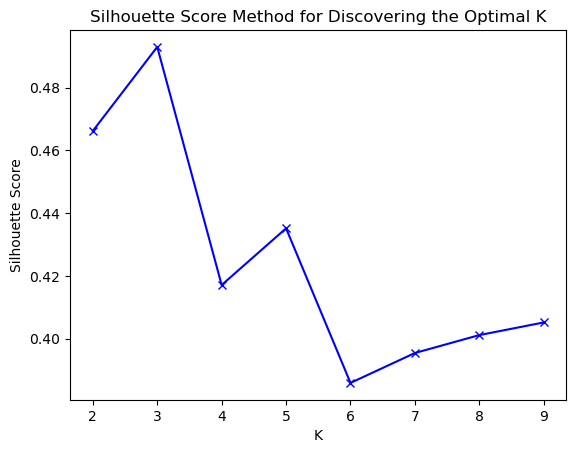

In [590]:
# Plot the elbow
plt.title('Silhouette Score Method for Discovering the Optimal K')
plt.plot(K, scores, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

The diagram shows that the optimal amount of clusters is 3 because it has the highest score which is closest to 1.